# Imports

In [1]:
import numpy as np
import random
from copy import deepcopy
import matplotlib.pyplot as plt

# K-means

## Distance Function

In [2]:
def eucl_dist(A, B):
    '''
    Calculate euclidean distance between two points
    '''
    squares = [(a - b)**2 for a, b in zip(A, B)]
    return(sum(squares)**0.5)

## Data

### Initial Parameters

In [3]:
# number of groups
num_grps = 3
# minimum number of points per group
min_pts = 15
# maximum number of points per group
max_pts = 50

### Generate Data

In [4]:
data = []
# generate randomized data set for each group
for i in range(num_grps):
    # random size of group based on limits
    size = np.random.randint(min_pts, max_pts+1)
    # centroid of group
    cntr = np.random.randint(1, 11, size=2)
    # assign x values (random centroid with noise)
    x = cntr[0] + np.random.normal(0, 0.5, size=size)
    # assign y values (random centroid with noise)
    y = cntr[1] + np.random.normal(0, 0.5, size=size)
    # combine x, y coords and group and add to data list
    data += [i for i in zip(x, y)]
# all x points in dataset
x_vals = [pt[0] for pt in data]
# all y points in dataset
y_vals = [pt[1] for pt in data]
# plot data
plt.scatter(x_vals, y_vals);

## Model

### 1. Initialize Cluster Centroids

In [6]:
# set number of groups for clustering the dataset
k = 3

In [7]:
# set all points to one cluster
clusters = np.zeros(len(data))

In [8]:
# set initial cluster centroids as k random points from dataset
centroids = np.array(random.choices(data, k=k))
centroids

array([[2.44741274, 7.7270244 ],
       [1.20563911, 6.14103973],
       [2.6632985 , 7.76463739]])

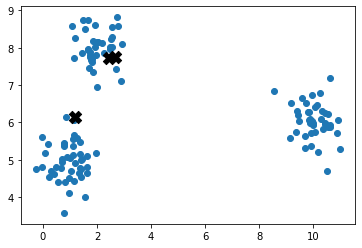

In [9]:
plt.scatter(x_vals, y_vals)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=150);

### 2. Assign Points to Clusters

In [10]:
# determine nearest cluster for each point
for i, point in enumerate(data):
    dist_list = []
    for j, centroid in enumerate(centroids):
        euc_d = eucl_dist(point, centroid)
        dist_list.append(euc_d)
        # assign point to nearest cluster
        if euc_d == min(dist_list):
            clusters[i] = j
clusters

array([0., 2., 0., 0., 0., 0., 2., 2., 0., 2., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 2.,
       0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

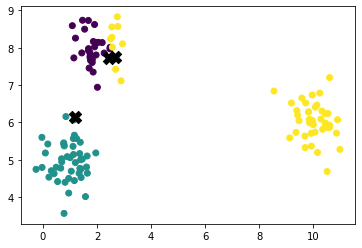

In [11]:
plt.scatter(x_vals, y_vals, c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=150);

### 3. Update Cluster Centroids

In [12]:
# calculate average centroid for each cluster group of points
for clust_num in range(len(centroids)):
    centroids[clust_num, 0] = np.mean(np.array(x_vals)[clusters == clust_num])
    centroids[clust_num, 1] = np.mean(np.array(y_vals)[clusters == clust_num])
centroids

array([[1.81903906, 7.96708674],
       [0.95012865, 4.98371654],
       [8.6182978 , 6.43407048]])

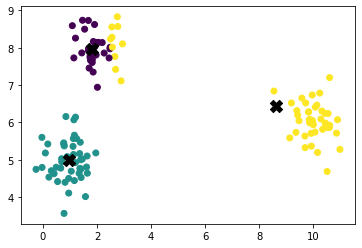

In [13]:
plt.scatter(x_vals, y_vals, c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=150);

### 4. Iterate

In [14]:
# set iteration tolerance
it_tol = 0.01

In [15]:
old_centroids = np.zeros(centroids.shape)

while max(np.array(list(map(eucl_dist, old_centroids, centroids)))) > it_tol:
    
    old_centroids = deepcopy(centroids)
    
    for i, point in enumerate(data):
        dist_list = []
        for j, centroid in enumerate(centroids):
            euc_d = eucl_dist(point, centroid)
            dist_list.append(euc_d)
            if euc_d == min(dist_list):
                clusters[i] = j
            
    for clust_num in range(len(centroids)):
        centroids[clust_num, 0] = np.mean(np.array(x_vals)[clusters == clust_num])
        centroids[clust_num, 1] = np.mean(np.array(y_vals)[clusters == clust_num])

### Final Clusters

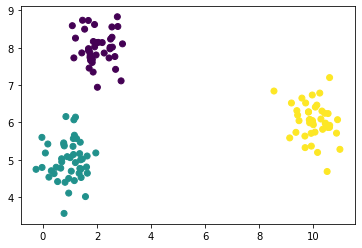

In [16]:
plt.scatter(x_vals, y_vals, c=clusters);

## Optimal Number of Clusters

In [17]:
# set max number of clusters
K = 10

## Squared Error (Inertia)
Calculate distance from each point to its cluster and sum

In [18]:
SE_list = []

for i in range(1, K+1):
    
    old_centroids = np.zeros(centroids.shape)
    clusters = np.zeros(len(data))
    centroids = np.array(random.choices(data, k=i))

    while max(np.array(list(map(eucl_dist, old_centroids, centroids)))) > it_tol:

        old_centroids = deepcopy(centroids)

        for i, point in enumerate(data):
            dist_list = []
            for j, centroid in enumerate(centroids):
                euc_d = eucl_dist(point, centroid)
                dist_list.append(euc_d)
                if euc_d == min(dist_list):
                    clusters[i] = j

        for clust_num in range(len(centroids)):
            centroids[clust_num, 0] = np.mean(np.array(x_vals)[clusters == clust_num])
            centroids[clust_num, 1] = np.mean(np.array(y_vals)[clusters == clust_num])
            
    for clust_num, centroid in enumerate(centroids):
        dist_list = []
        for point in np.array(data)[clusters == clust_num]:
            dist_list.append(eucl_dist(point, centroid))
    SE_list.append(sum(dist_list))
# ignore warning

/home/kevcon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kevcon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


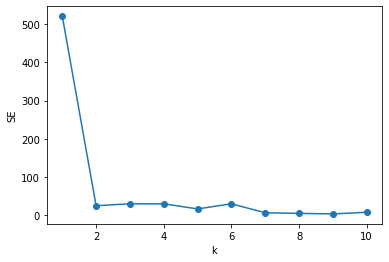

In [19]:
# select k value at "elbow" in plot
plt.plot(range(1, K+1), SE_list, marker='o')
plt.xlabel('k')
plt.ylabel('SE');

# Sklearn K-means

In [20]:
from sklearn.cluster import KMeans

In [21]:
# create instance of kmeans model with input for number of clusters
km = KMeans(n_clusters=k)

In [22]:
# fit model to data set
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
# output group assignment from model
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

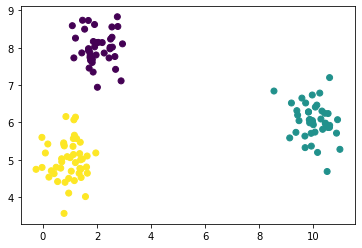

In [24]:
plt.scatter(x_vals, y_vals, c=km.labels_);

## Optimization

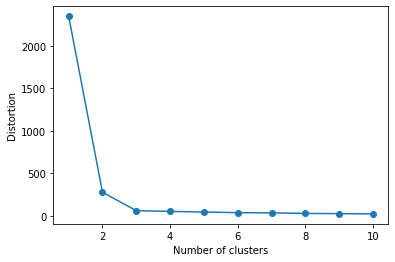

In [25]:
SSE = []
for i in range(1, K+1):
    km = KMeans(n_clusters=i)
    km.fit(data)
    SSE.append(km.inertia_)

# plot
plt.plot(range(1, K+1), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');